# Import the Library and the modules 

In [16]:

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering



# Insert the dataset 

In [17]:
mall_customers_data = pd.read_csv('mall customers.csv')
data_frame = pd.DataFrame(mall_customers_data)
print("data before cleaning")
data_frame

data before cleaning


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0
199,200,Male,30,137.0,83.0
200,201,Female,25,NaN,19.0


# Data Preprocessing

# Data Reduction 

# Remove unused column(features)

In [18]:
data_frame = data_frame.drop('CustomerID', axis=1)
data_frame = data_frame.drop('Gender', axis=1)
data_frame = data_frame.drop('Age', axis=1)
print(data_frame.size())

   Annual Income (k$)  Spending Score (1-100)
0                15.0                    39.0
1                15.0                    81.0
2                16.0                     6.0
3                16.0                    77.0
4                17.0                    40.0


# Data Cleaning

# Calculate mean for annual income and spending score

In [19]:

anual_income_mean = int(data_frame['Annual Income (k$)'].mean())
print("anual_income_mean",anual_income_mean)
print("=======================================================================")
spending_score_mean =int( data_frame['Spending Score (1-100)'].mean())
print("spending_score_mean",spending_score_mean)
print("=======================================================================")

# data_frame.mean()

anual_income_mean 60
spending_score_mean 50


# Data after cleaning

In [20]:
print("data after cleaning")
data_frame = data_frame.drop_duplicates()
# Replace null values with mean
data_frame['Annual Income (k$)'] = data_frame['Annual Income (k$)'].fillna(anual_income_mean)
data_frame['Spending Score (1-100)']=data_frame['Spending Score (1-100)'].fillna(spending_score_mean)
data_frame

data after cleaning


,Annual Income (k$),Spending Score (1-100)
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0
...,...,...
197,126.0,74.0
198,137.0,18.0
199,137.0,83.0
200,60.0,19.0


# Visualizing the data

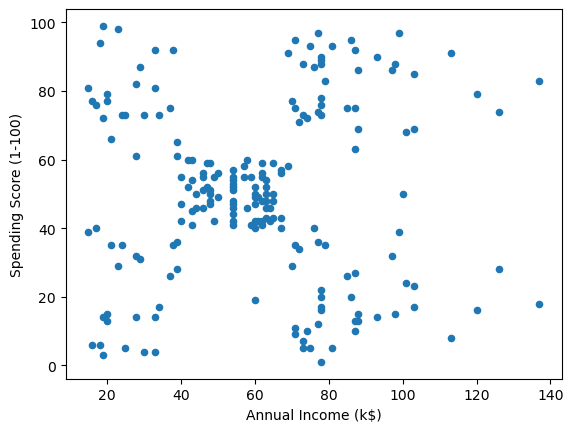

In [21]:
data_frame.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

# Data Scaling

#  Normalization  

# MinMaxScaler : to scale numerical features within a specific range 0-1 

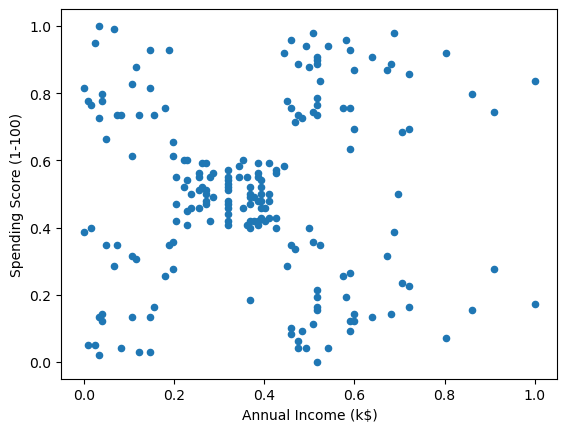

In [22]:
scaler = MinMaxScaler()
columns_to_normalize = ['Annual Income (k$)', 'Spending Score (1-100)']
data_frame[columns_to_normalize] = scaler.fit_transform(data_frame[columns_to_normalize])
data_frame.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

# Create  hopkins function to verify that this dataset is suitable for clustering

In [23]:
import numpy as np
def hopkins_statistic(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = scale(np.random.random(size=(m, d)))
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(size=(1, d)).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[[j]], 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print("undefined Hopkins statistic, probably due to duplicate points in X")
        return None
    else:
        return H

features = data_frame[['Annual Income (k$)', 'Spending Score (1-100)']]
hopkins_score = hopkins_statistic(features)
threshold = 0.7

print(f'Hopkins statistic: {hopkins_score}')

if(hopkins_score > threshold):
  print('Valid for clustering')
else:
  print('Not valid for clustering')



Hopkins statistic: 0.7314705931591288
Valid for clustering


C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  w

#  To find the optimal number of clusters  for our  dataset we use Elbow method

C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

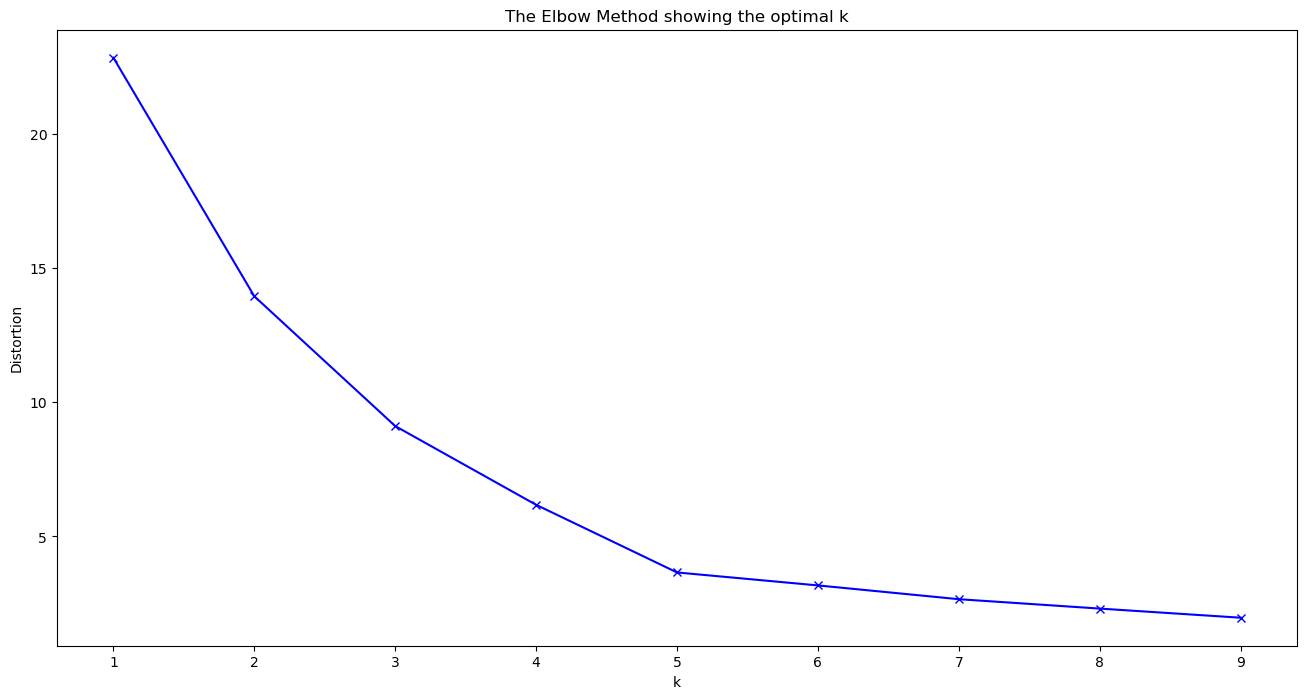

In [24]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Cluster the data using partitioning methods:K-means, K-medoids

In [25]:
optimal_k = 5 # we decided k is equal to 5 
kmeans = KMeans(n_clusters=optimal_k)
kmedoids = KMedoids(n_clusters=optimal_k)


data_frame['kmeans_cluster'] = kmeans.fit_predict(features)
data_frame['kmedoids_cluster'] = kmedoids.fit_predict(features)



C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Husse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


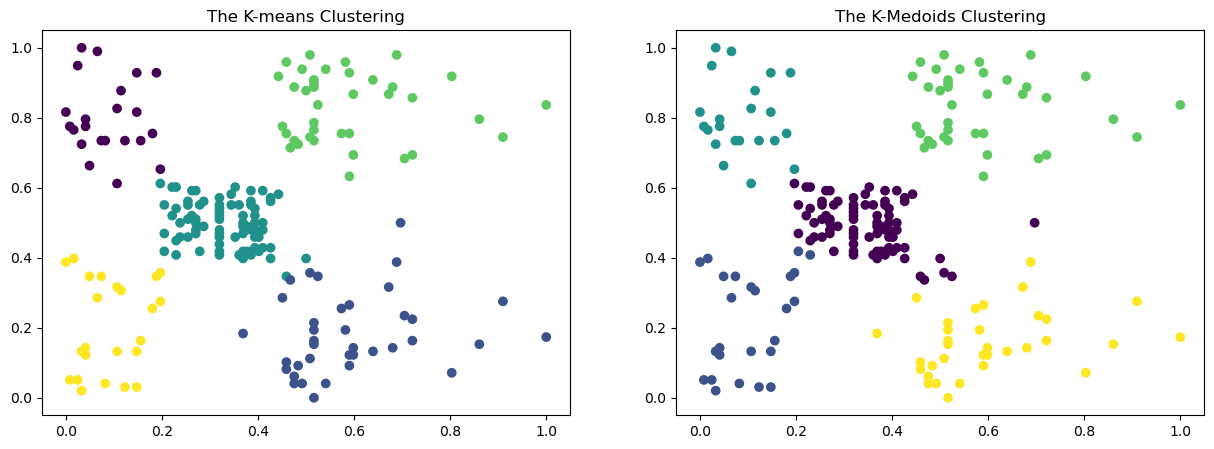

In [26]:
plt.figure(figsize=(15, 5))

# The K-means plot
plt.subplot(1, 2, 1)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['kmeans_cluster'])
plt.title('The K-means Clustering')

# The K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['kmedoids_cluster'])
plt.title('The K-Medoids Clustering')
plt.show()


# Cluster the data using hierarchical method:AGNES, and density method:DBSCAN

In [27]:
agnes = AgglomerativeClustering(n_clusters=optimal_k)#by default ward:minimizes the variance of the clusters being merged.
dbscan = DBSCAN(eps=0.1, min_samples=5)
data_frame['agnes_cluster'] = agnes.fit_predict(features)
data_frame['DBSCAN_cluster'] = dbscan.fit_predict(features)

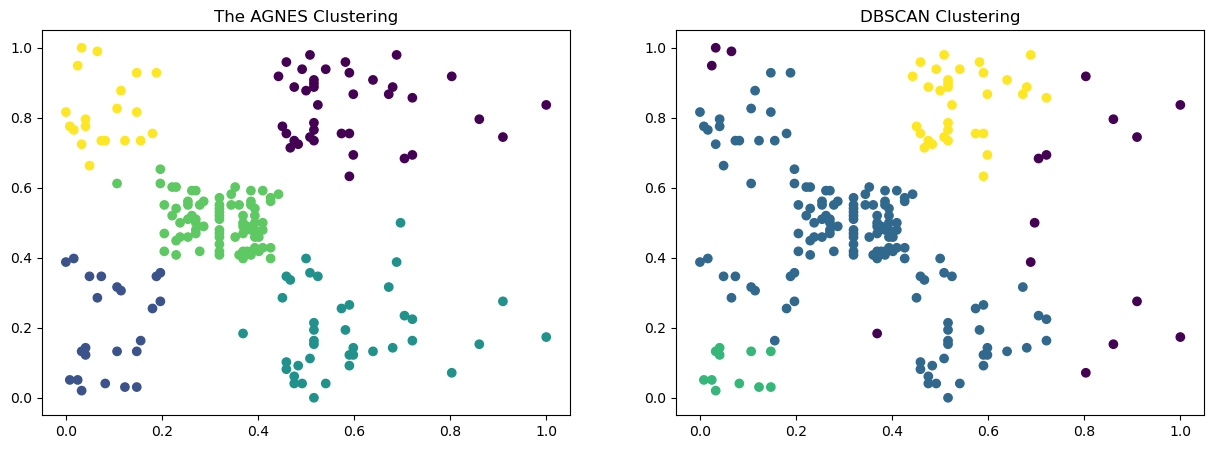

In [28]:
plt.figure(figsize=(15, 5))

# The AGNES plot
plt.subplot(1, 2, 1)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['agnes_cluster'])
plt.title('The AGNES Clustering')

plt.subplot(1,2,2)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['DBSCAN_cluster'])
plt.title('DBSCAN Clustering')
plt.show()


# Result Analysis

In [29]:
data_frame.head(20)

,Annual Income (k$),Spending Score (1-100),kmeans_cluster,kmedoids_cluster,agnes_cluster,DBSCAN_cluster
0,0.000000,0.387755,4,1,1,0
1,0.000000,0.816327,0,2,4,0
2,0.008197,0.051020,4,1,1,1
3,0.008197,0.775510,0,2,4,0
4,0.016393,0.397959,4,1,1,0
5,0.016393,0.765306,0,2,4,0
6,0.024590,0.051020,4,1,1,1
7,0.024590,0.948980,0,2,4,-1
8,0.032787,0.020408,4,1,1,1
9,0.032787,0.724490,0,2,4,0


# Ploting the results

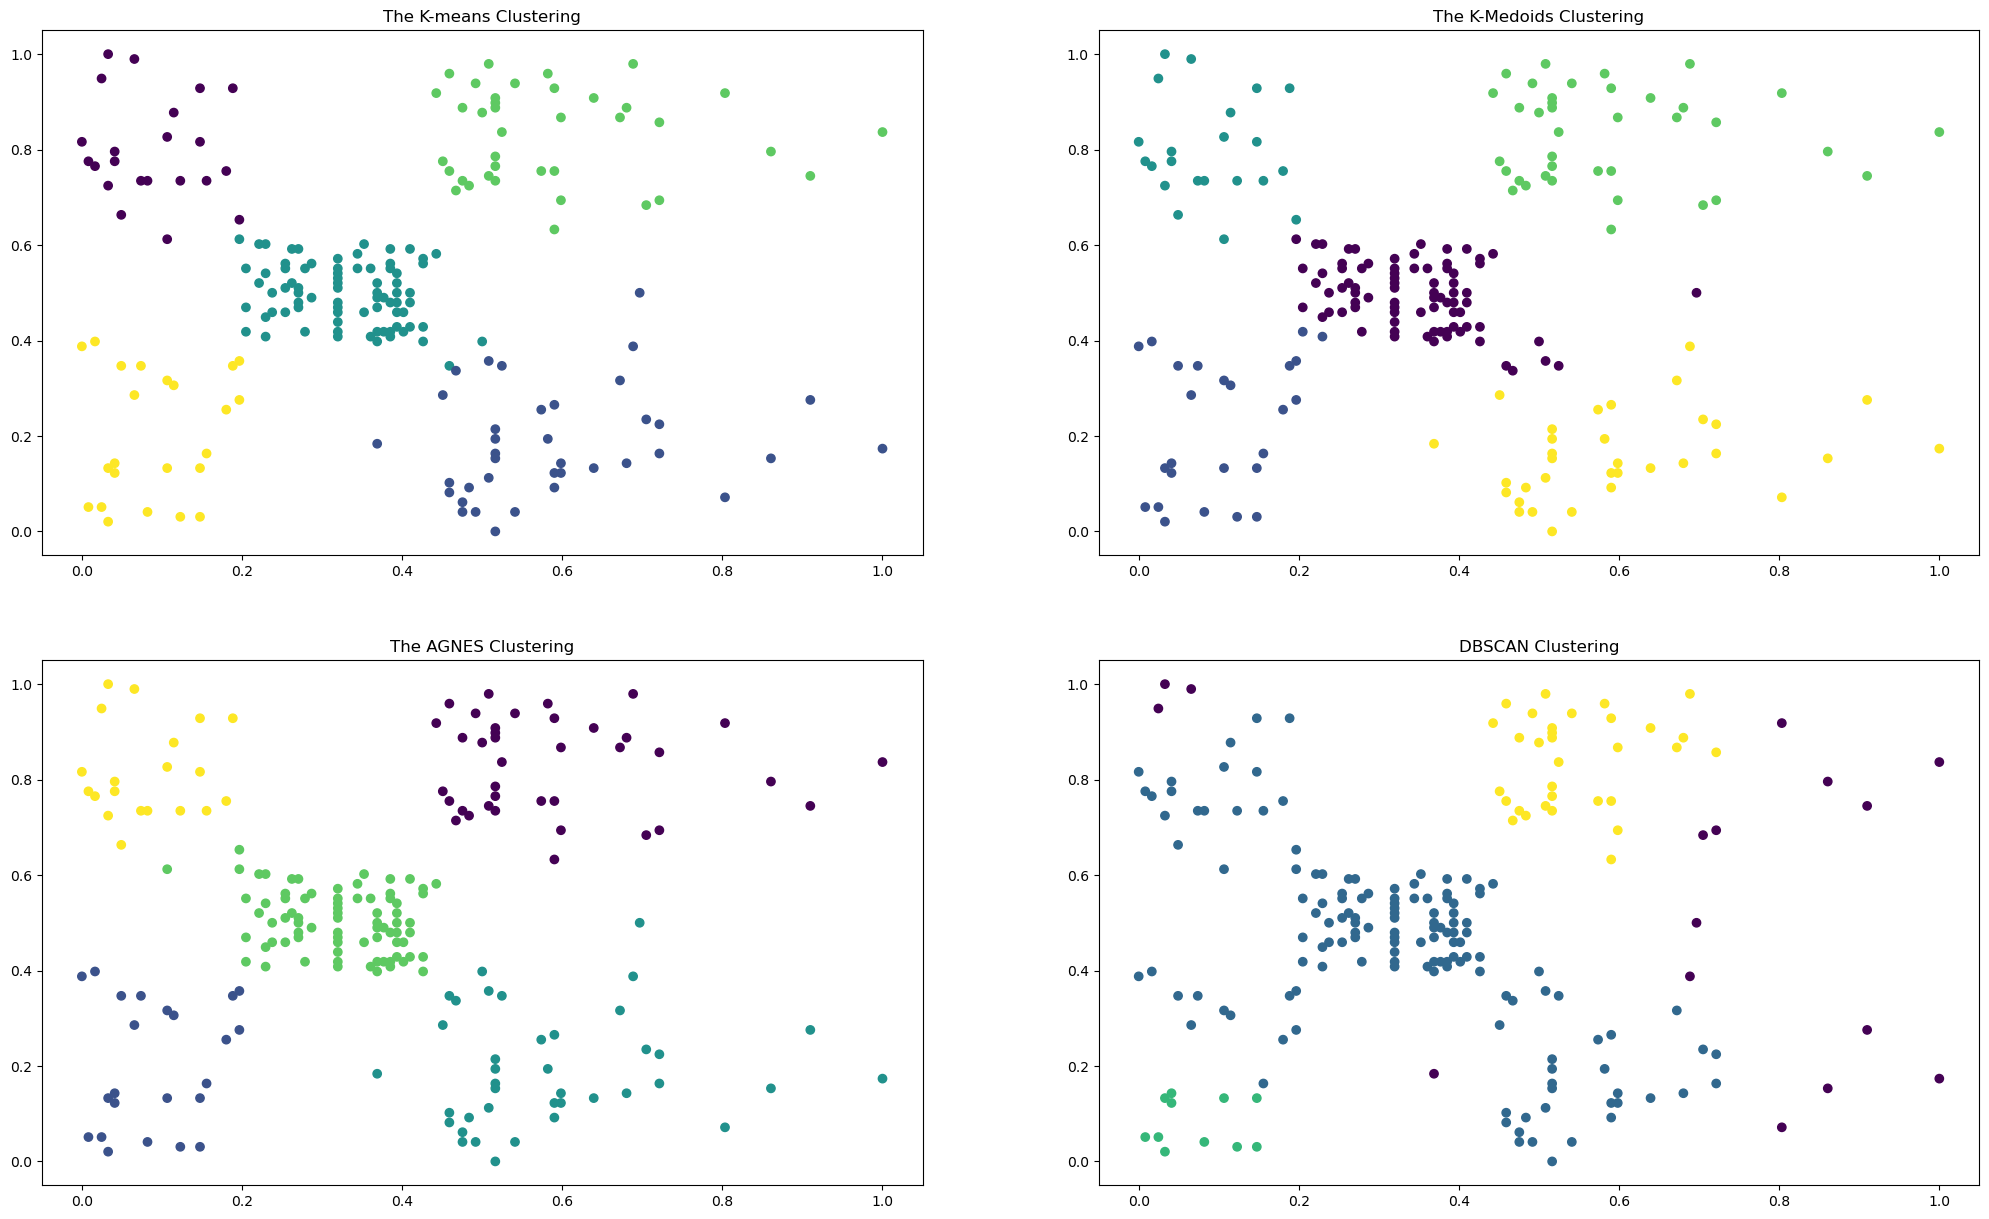

In [30]:
plt.figure(figsize=(25, 15))

# The K-means plot
plt.subplot(2, 2, 1)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['kmeans_cluster'])
plt.title('The K-means Clustering')

# The K-Medoids plot
plt.subplot(2, 2, 2)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['kmedoids_cluster'])
plt.title('The K-Medoids Clustering')

#AGNES
plt.subplot(2, 2, 3)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['agnes_cluster'])
plt.title('The AGNES Clustering')

#DBSCAN
plt.subplot(2,2,4)
plt.scatter(data_frame['Annual Income (k$)'], data_frame['Spending Score (1-100)'], c=data_frame['DBSCAN_cluster'])
plt.title('DBSCAN Clustering')
plt.show()